### 1. Import the Libraries


In [271]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random

### 2. Load the image and convert into GrayScale


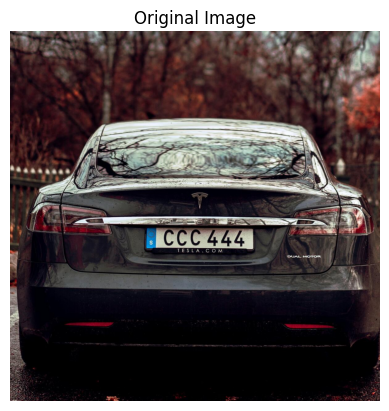

In [272]:
img = cv2.imread("image1.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

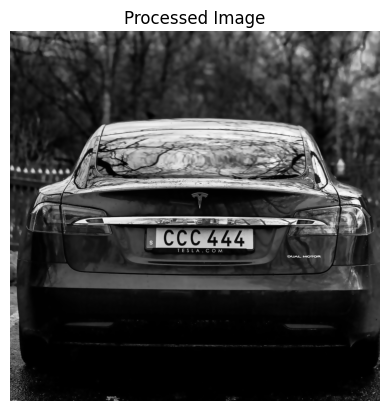

In [273]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) 
plt.title('Processed Image')
plt.axis('off')
plt.show()

### 4. Find the Contours


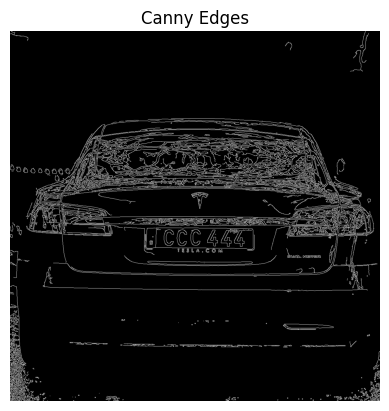

In [274]:
edged = cv2.Canny(bfilter,40, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.title('Canny Edges')
plt.axis('off')
plt.show()

In [275]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours 
contours = imutils.grab_contours(keypoints) #Grab contours 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
     
print("Location: ", location)

Location:  [[[474 639]]

 [[784 641]]

 [[789 703]]

 [[473 702]]]


### 5. Isolate the Area of Interest


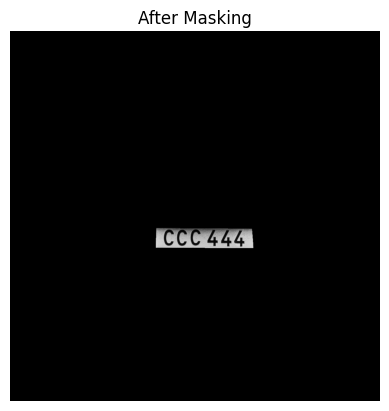

In [276]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1) 
new_image = cv2.bitwise_and(gray, gray, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.title('After Masking')
plt.axis('off')
plt.show()

### 6. Crop the Area of Interest


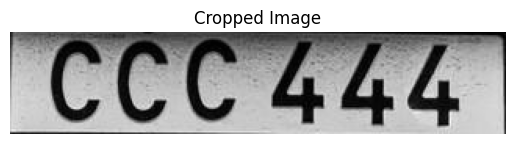

In [277]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')
plt.show()

### 7. Bypass the ssl verification for downloading the detection models


In [278]:
import ssl
import urllib

ssl._create_default_https_context = ssl._create_unverified_context

### 8. Load the Detection and Recognition Model and Recognize the Text


In [279]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[18, 0], [298, 0], [298, 65], [18, 65]], 'CCC 444', 0.7102923500646642)]

### 9. Display the Output


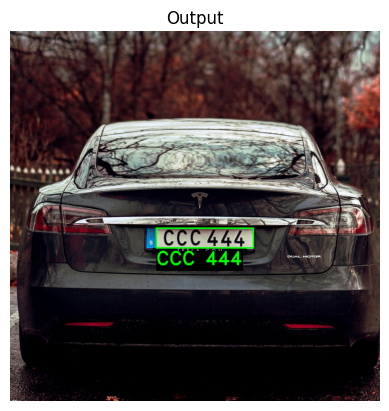

In [280]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_DUPLEX
viz = img.copy()
(text_width, text_height), baseline = cv2.getTextSize(text, font, fontScale=2, thickness=3)

top_left = (approx[0][0][0], approx[2][0][1] + 10)
bottom_right = (approx[0][0][0] + text_width, approx[2][0][1] + 10 + text_height + baseline)

cv2.rectangle(viz, top_left, bottom_right, (0, 0, 0), thickness=cv2.FILLED)
res = cv2.putText(viz, text=text, org=(approx[0][0][0], approx[2][0][1] + 10 + text_height), fontFace=font, fontScale=2, color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)
res = cv2.rectangle(viz, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Output')
plt.axis('off')
plt.show()

## The Streamlined Method


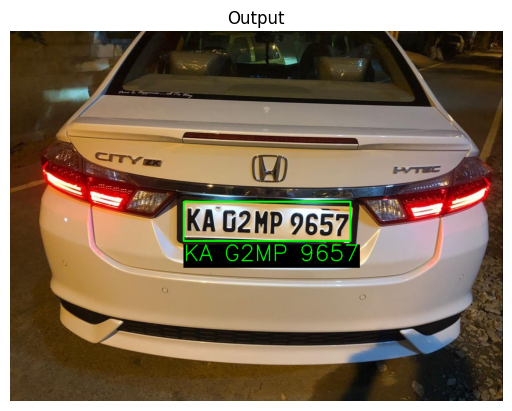

In [287]:
def ANPR(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
    if location is None:
        raise ValueError("No contour with 4 points found.")
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(gray, gray, mask=mask)
    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    text = result[0][-2]
    font = cv2.FONT_HERSHEY_SIMPLEX
    viz = img.copy()
    (text_width, text_height), baseline = cv2.getTextSize(text, font, fontScale=2, thickness=2)
    top_left = (approx[0][0][0], approx[2][0][1] + 10)
    bottom_right = (approx[0][0][0] + text_width, approx[2][0][1] + 10 + text_height + baseline)
    cv2.rectangle(viz, top_left, bottom_right, (0, 0, 0), thickness=cv2.FILLED)
    res = cv2.putText(viz, text=text, org=(approx[0][0][0], approx[2][0][1] + 10 + text_height), fontFace=font, fontScale=2, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(viz, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    return res, text

res, text = ANPR("image2.jpeg")
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('Output') 
plt.axis('off')
plt.show()
    